The goal of this project was to predict customer churn using historical data from a telecommunications company. By identifying customers at risk of leaving, the business can take proactive measures to retain them and reduce revenue loss.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# **Explorative Data Analysis (EDA)**

In [7]:
df = pd.read_csv('customer_churn_data.csv')
df.head()

,CustomerID,Gender,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Contract,InternetService,PaymentMethod,Churn
0,1,Female,0,52,115.07,5988.28,Two year,DSL,Bank transfer,No
1,2,Female,1,61,79.69,4860.01,Month-to-month,Fiber optic,Bank transfer,No
2,3,Male,0,24,85.09,2033.29,Month-to-month,Fiber optic,Bank transfer,Yes
3,4,Female,0,30,41.23,1230.54,Month-to-month,Fiber optic,Bank transfer,No
4,5,Female,0,21,81.75,1718.98,Two year,DSL,Bank transfer,Yes


In [8]:
df.describe()

,CustomerID,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.490000,35.210000,69.187720,2488.549620
std,144.481833,0.500401,21.052323,29.037511,1993.187401
min,1.000000,0.000000,1.000000,20.050000,12.880000
25%,125.750000,0.000000,17.000000,44.407500,803.122500
50%,250.500000,0.000000,35.000000,69.410000,1956.050000
75%,375.250000,1.000000,53.000000,94.125000,3676.370000
max,500.000000,1.000000,72.000000,119.970000,8516.860000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       500 non-null    int64  
 1   Gender           500 non-null    object 
 2   SeniorCitizen    500 non-null    int64  
 3   Tenure           500 non-null    int64  
 4   MonthlyCharges   500 non-null    float64
 5   TotalCharges     500 non-null    float64
 6   Contract         500 non-null    object 
 7   InternetService  500 non-null    object 
 8   PaymentMethod    500 non-null    object 
 9   Churn            500 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB


In [15]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Tenure,0
MonthlyCharges,0
TotalCharges,0
Contract,0
InternetService,0
PaymentMethod,0
Churn,0


In [17]:
df.dropna(inplace=True)

# Chart comparing Churn to other features

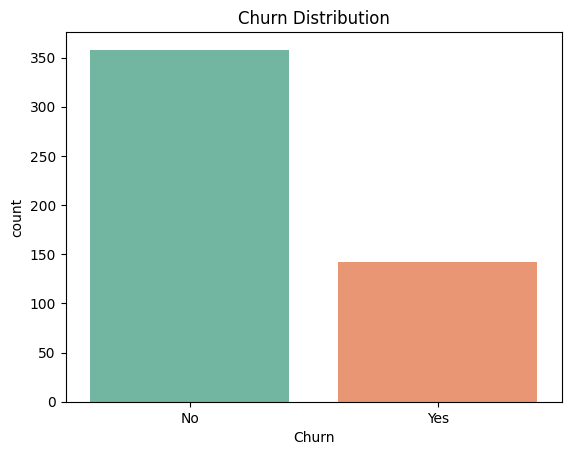

In [18]:
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.show()

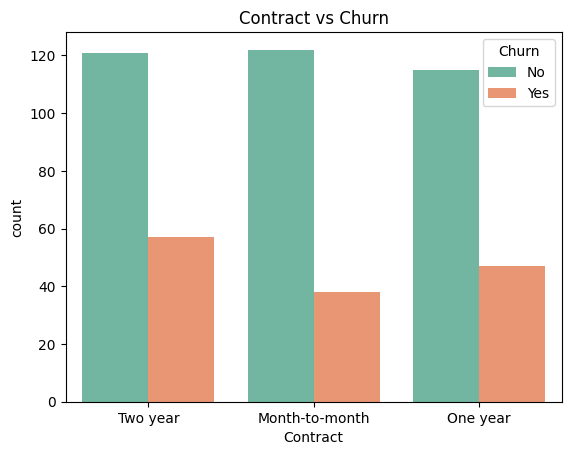

In [19]:
sns.countplot(data=df, x="Contract", hue="Churn", palette='Set2')
plt.title('Contract vs Churn')
plt.show()

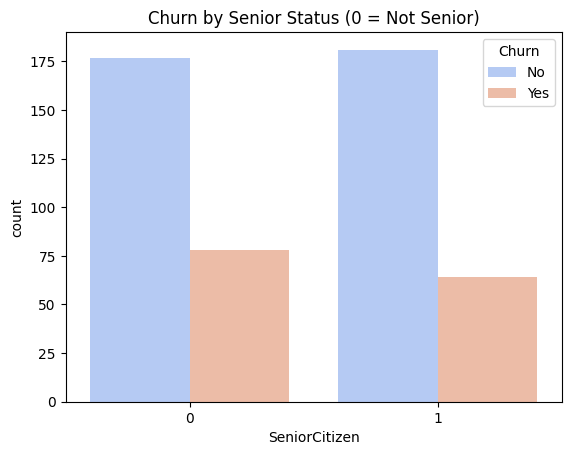

In [20]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn", palette="coolwarm")
plt.title("Churn by Senior Status (0 = Not Senior)")
plt.show()


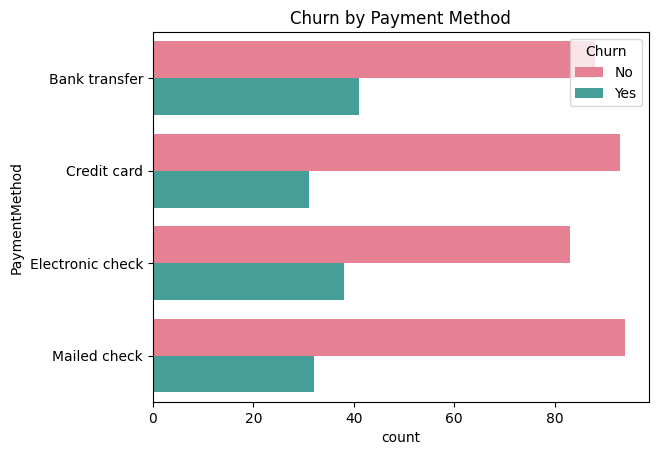

In [21]:
sns.countplot(data=df, y="PaymentMethod", hue="Churn", palette="husl")
plt.title("Churn by Payment Method")
plt.show()


# **MODEL DEVELOPMENT**

I decided to make a little machine Learning to predict Churn


In [23]:
#copy the data
ml_df = df.copy()


In [25]:
#encoding categorial data
cats_cols = ml_df.select_dtypes('object').columns

In [28]:
le = LabelEncoder()
for col in cats_cols:
    ml_df[col] = le.fit_transform(ml_df[col])

In [31]:
#split features and target
X = ml_df.drop('Churn', axis=1)
y = ml_df['Churn']

In [32]:
#spilt data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#initializing and training model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)

In [35]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



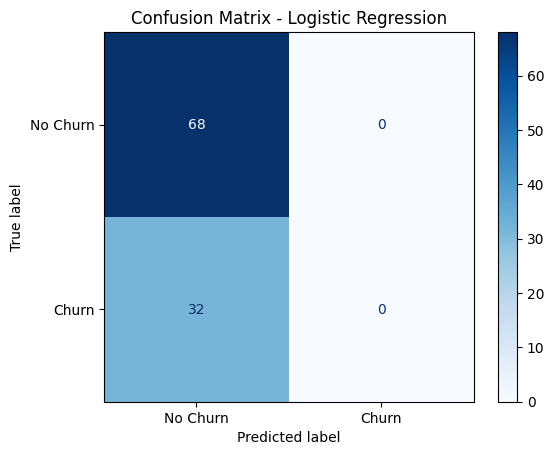

In [42]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["No Churn", "Churn"], cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [43]:
#top features driving churn
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

feature_importance.head(10)


,Feature,Coefficient
2,SeniorCitizen,-0.292408
6,Contract,0.275883
7,InternetService,0.205371
8,PaymentMethod,-0.132576
1,Gender,-0.024094
3,Tenure,-0.015527
4,MonthlyCharges,-0.009473
0,CustomerID,-0.000754
5,TotalCharges,0.000204


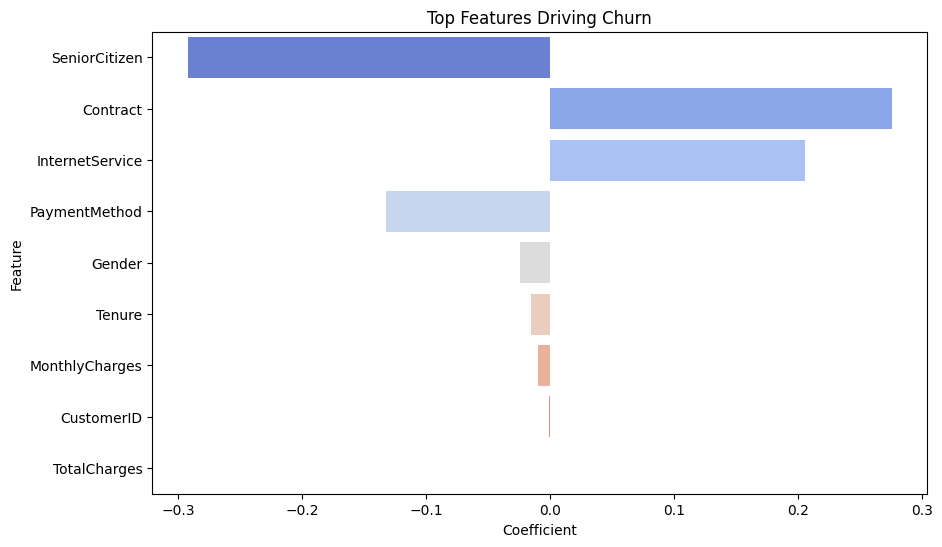

In [46]:
#barchart for feature important
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.title("Top Features Driving Churn")
plt.show()

In [50]:
#Using Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [51]:
#Analysis of Random Forest Model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80        68
           1       0.40      0.06      0.11        32

    accuracy                           0.67       100
   macro avg       0.54      0.51      0.45       100
weighted avg       0.59      0.67      0.58       100



The model is barely catching churners (Recall = 6%).

It's being overly cautious and predicting “No” too often.

I am going to try class Balancing now

In [53]:
#Using Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81        68
           1       0.57      0.12      0.21        32

    accuracy                           0.69       100
   macro avg       0.64      0.54      0.51       100
weighted avg       0.66      0.69      0.61       100



The model is now more aware that churners matter — it's predicting them more often.

Still not perfect — but we’ve improved the F1-score for churners from 0.11 → 0.21.

In [54]:
#trying to improve using SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data only
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Train on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

# Evaluate on real test set
y_pred_sm = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_sm))


Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        68
           1       0.32      0.28      0.30        32

    accuracy                           0.58       100
   macro avg       0.50      0.50      0.50       100
weighted avg       0.57      0.58      0.57       100



SMOTE made the model better at recognizing churners, but at the cost of overall accuracy.

What I am going to do is use my model from Random Forrest Using Weigh Class and then try threshold tuning on the model

In [55]:
# Get churn probabilities from the model
y_probs = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

# Evaluate
print(f"Threshold: {threshold}")
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))

Threshold: 0.3
Accuracy: 0.43

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.32      0.44        68
           1       0.31      0.66      0.42        32

    accuracy                           0.43       100
   macro avg       0.49      0.49      0.43       100
weighted avg       0.55      0.43      0.43       100



Accuracy has dropped again but f1 has improved, I am going to run for few more thresholds to see if there is any improvement


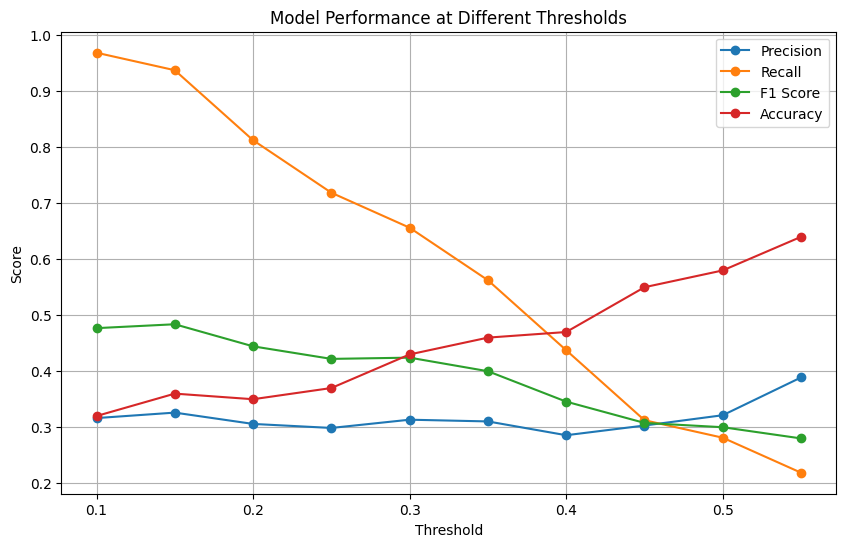

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.1, 0.6, 0.05)
precision_scores = []
recall_scores = []
f1_scores = []
accuracies = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh))
    recall_scores.append(recall_score(y_test, y_pred_thresh))
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    accuracies.append(accuracy_score(y_test, y_pred_thresh))

# Plotting
plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_scores, label="Precision", marker='o')
plt.plot(thresholds, recall_scores, label="Recall", marker='o')
plt.plot(thresholds, f1_scores, label="F1 Score", marker='o')
plt.plot(thresholds, accuracies, label="Accuracy", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Model Performance at Different Thresholds")
plt.legend()
plt.grid(True)
plt.show()


I think 0.3 threshold is still the best
